<center><font size ="9"> FINAL PROJECT </font></center>
<center><font size ="6"> INTELLIGENT DATA ANALYSIS: FINAL PROJECT - 1/5/2021</font></center></br>
<p style='text-align: right;'><font size ="3"> University of Science - VNUHCM</font></p>
</br>

## Import

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import calendar
from sklearn import svm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

## Display setting

In [2]:
pd.set_option('max_colwidth', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
sns.set_theme()

## Data reading

In [3]:
df = pd.read_csv("../data/US_Accidents_Dec20_Updated.csv")

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Branch Ln.,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA-17) to Idylwild Rd (CA-17) due to accident.,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine Island Rd.,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Exploration

**Xem kích thước của dữ liệu**

In [5]:
df.shape

(2906610, 47)

### Dữ liệu có các dòng bị lặp không?

In [6]:
df.duplicated().sum()

0

**Xem ý nghĩa của các cột**

In [7]:
schema_df = pd.read_csv('Schema.tsv', delimiter = '\t', index_col='#')
schema_df

,Attribute,Description,Nullable
#,,,
1,ID,This is a unique identifier of the accident record.,No
2,Severity,"Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).",No
3,Start_Time,Shows start time of the accident in local time zone.,No
4,End_Time,Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.,No
5,Start_Lat,Shows latitude in GPS coordinate of the start point.,No
6,Start_Lng,Shows longitude in GPS coordinate of the start point.,No
7,End_Lat,Shows latitude in GPS coordinate of the end point.,Yes
8,End_Lng,Shows longitude in GPS coordinate of the end point.,Yes
9,Distance(mi),The length of the road extent affected by the accident.,No


**Xem tỉ lệ dữ liệu bị thiếu**

In [8]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

In [9]:
missing = df.agg(missing_ratio)
missing[missing > 0]

End_Lat               9.7
End_Lng               9.7
Number               65.1
Timezone              0.1
Airport_Code          0.2
Weather_Timestamp     1.6
Temperature(F)        2.3
Wind_Chill(F)        40.7
Humidity(%)           2.5
Pressure(in)          2.0
Visibility(mi)        2.5
Wind_Direction        2.2
Wind_Speed(mph)      10.6
Precipitation(in)    44.8
Weather_Condition     2.5
dtype: float64

**Nhận xét:** Các cột bị thiếu trên 35% sẽ bị xóa ở bước tiền xử lý

**Xem kiểu dữ liệu của các cột**

In [10]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

Ta thấy các cột `Start_Time, End_Time, Weather_Timestamp` có kiểu dữ liệu chưa phù hợp nên ta sẽ chuyển sang kiểu datetime

# Preprocessing

Xóa các cột bị thiếu trên 35%

In [11]:
df.drop(columns=['Wind_Chill(F)', 'Precipitation(in)', 'Number'], inplace=True)

## Chuyển các cột có ý nghĩa ngày tháng về kiểu datetime

In [12]:
df['Start_Time']= pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
df['End_Time']= pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
df['Weather_Timestamp']= pd.to_datetime(df['Weather_Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='ignore')

#### Xem các cột có thể thay thế những giá trị thiếu (tỉ lệ dữ liệu bị thiếu lớn hơn 0% và nhỏ hơn 35%)

In [13]:
fillable_cols = np.array(missing[(missing>0) & (missing < 35)].index)
fillable_cols

array(['End_Lat', 'End_Lng', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition'], dtype=object)

## Thay thế các giá trị bị thiếu ở cột `Weather_Timestamp`

In [14]:
df['Weather_Timestamp'].fillna(df['Start_Time'], inplace=True)

### Với mỗi cột input có kiểu dữ liệu có dạng số, các giá trị được phân bố như thế nào?

In [15]:
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)'],
      dtype='object')

In [16]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)

In [17]:
df[num_cols].agg([min,lower_quartile, median, upper_quartile,max])

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
min,1.0,24.555269,-124.623833,24.555269,-124.623833,0.000000,-89.0,1.0,0.00,0.0,0.0
lower_quartile,2.0,33.700000,-117.800000,33.600000,-117.700000,0.000000,48.9,49.0,29.60,10.0,4.6
median,2.0,36.100000,-91.200000,36.100000,-91.100000,0.000000,63.0,68.0,29.90,10.0,7.0
upper_quartile,3.0,40.400000,-80.900000,40.300000,-80.800000,0.300000,75.0,85.0,30.10,10.0,10.4
max,4.0,49.002201,-67.113167,49.075000,-67.109242,333.630005,203.0,100.0,58.04,140.0,984.0


**Nhận xét:**
- Thuộc tính `Severity`, `Start_Lat` và `Start_Lng` có vẻ như không có gì bất thường
- Ta không thể biết được khoảng giá trị của trường `Distance` mặc dù dữ liệu có hơi bất thường. Ta sẽ phân tích sâu hơn ở phần sau
- Tiếp theo, ta sẽ xóa các giá trị không phù hợp ở các trường còn lại

### Xóa các giá trị không phù hợp


**Giá trị hợp lệ của một số trường:**
- Temperature(F): -80 đến 134
- Humidity(%): 0 đến 100
- Pressure(in): 25.69 đến 31.85
- Wind_Speed(mph): 0 đến 231
- Visibility(mi): 0 đến 150

Loại bỏ các giá trị không phù hợp

In [18]:
df = df[(df['Temperature(F)'] < 134)]

In [19]:
df = df[df['Wind_Speed(mph)'] < 231]

In [20]:
df = df[(df['Pressure(in)'] > 25.69) & (df['Pressure(in)'] < 31.85)]

### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [21]:
object_cols = df.select_dtypes(exclude = ['number', 'datetime64']).columns

In [22]:
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100)[0:5].round(3))
df[object_cols].agg([num_values, value_ratios])

,ID,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
num_values,2539236,1318501,163133,3,11315,1703,49,338732,1,4,1961,23,123,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
value_ratios,"{'A-2481809': 0.0, 'A-2584136': 0.0, 'A-2635849': 0.0, 'A-2282416': 0.0, 'A-834429': 0.0}","{'A crash has occurred causing no to minimum delays. Use caution.': 0.1, 'At I-5 - Accident.': 0.07, 'At I-405/San Diego Fwy - Accident.': 0.067, 'At I-15 - Accident.': 0.066, 'At I-605 - Accident.': 0.054}","{'I-5 N': 1.29, 'I-95 N': 1.22, 'I-95 S': 1.089, 'I-5 S': 0.882, 'I-10 E': 0.826}","{'R': 82.786, 'L': 17.214, ' ': 0.0}","{'Houston': 2.389, 'Los Angeles': 2.135, 'Charlotte': 1.967, 'Miami': 1.845, 'Dallas': 1.823}","{'Los Angeles': 7.565, 'Orange': 2.919, 'Harris': 2.564, 'Miami-Dade': 2.415, 'Dallas': 2.152}","{'CA': 24.896, 'FL': 9.633, 'TX': 8.049, 'NY': 4.548, 'NC': 4.264}","{'91761': 0.19, '91706': 0.158, '92507': 0.149, '92407': 0.133, '91765': 0.118}",{'US': 100.0},"{'US/Eastern': 42.636, 'US/Pacific': 30.349, 'US/Central': 22.831, 'US/Mountain': 4.183}","{'KCQT': 1.48, 'KCLT': 1.431, 'KRDU': 1.411, 'KMCJ': 1.391, 'KBNA': 1.262}","{'CALM': 11.33, 'WNW': 5.53, 'SSW': 5.419, 'NW': 5.331, 'SW': 5.139}","{'Fair': 26.296, 'Clear': 15.096, 'Mostly Cloudy': 13.911, 'Partly Cloudy': 9.597, 'Cloudy': 9.34}","{False: 98.919, True: 1.081}","{False: 99.981, True: 0.019}","{False: 92.374, True: 7.626}","{False: 99.725, True: 0.275}","{False: 90.503, True: 9.497}","{False: 99.868, True: 0.132}","{False: 99.107, True: 0.893}","{False: 99.995, True: 0.005}","{False: 97.979, True: 2.021}","{False: 98.437, True: 1.563}","{False: 99.956, True: 0.044}","{False: 84.176, True: 15.824}",{False: 100.0},"{'Day': 67.492, 'Night': 32.508}","{'Day': 71.867, 'Night': 28.133}","{'Day': 76.441, 'Night': 23.559}","{'Day': 80.043, 'Night': 19.957}"


**Nhận xét:**
- Trường `Country` hơi dư thừa chỉ chứa dữ liệu của nước Mỹ nên ta sẽ xóa trường này
- Xóa các giá trị ' ' ở trường `Side` vì theo mô tả, trường này chỉ nhận 2 giá trị là L hoặc R

In [23]:
df.drop(columns=['Country', 'Turning_Loop'], inplace= True)

In [24]:
df = df[df.Side !=' ']

In [25]:
df.drop( columns = ['Amenity','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], inplace=True)

### Với mỗi cột input có kiểu dữ liệu có dạng datetime, các giá trị được phân bố như thế nào?

In [26]:
datetime_cols = df.select_dtypes(include = 'datetime64').columns

In [27]:
df[datetime_cols].agg(['min', num_values, 'max'])

,Start_Time,End_Time,Weather_Timestamp
min,2016-02-08 00:37:08,2016-02-08 06:37:08,2016-02-08 00:53:00
num_values,2068733,2185589,473830
max,2020-12-31 23:28:56,2021-01-01 00:00:00,2020-12-31 23:35:00


In [28]:
df[['Start_Time', 'Weather_Timestamp']]

,Start_Time,Weather_Timestamp
0,2019-05-21 08:29:55,2019-05-21 08:53:00
1,2019-10-07 17:43:09,2019-10-07 17:53:00
2,2020-12-13 21:53:00,2020-12-13 21:53:00
3,2018-04-17 16:51:23,2018-04-17 16:55:00
4,2016-08-31 17:40:49,2016-08-31 17:53:00
...,...,...
2906604,2020-10-02 08:42:20,2020-10-02 08:53:00
2906605,2018-06-28 08:49:01,2018-06-28 08:35:00
2906607,2020-11-23 12:52:00,2020-11-23 12:53:00
2906608,2019-12-29 22:38:00,2019-12-29 22:54:00


In [29]:
df.drop(columns = 'Weather_Timestamp', inplace= True)

**Nhận xét:**
- Ta thấy thời gian ghi nhận điều kiện thời tiết và thời gian xảy ra tai nạn gần như giống nhau do đó ta sẽ xóa cột `Weather_Timestamp`


**Kiểm tra thời gian bắt đầu có nhỏ hơn thời gian kết thúc không ?**

In [30]:
len(df[df['Start_Time'] > df['End_Time']])

0

**Nhận xét:** Ta thấy không có dòng nào thời gian bắt đầu lớn hơn thời gian kết thúc

### Điền giá trị vào các trường bị khuyết còn lại

#### Xem tỉ lệ các giá trị bị thiếu

In [31]:
missing = df.agg(missing_ratio)
missing[missing > 0]

End_Lat              9.4
End_Lng              9.4
Humidity(%)          0.1
Visibility(mi)       0.3
Weather_Condition    0.3
dtype: float64

**Nhận xét:**
- Vì dữ liệu bị thiếu không nhiều và dữ liệu còn lại khá lớn nên ta xóa các dòng bị khuyết

In [32]:
df.dropna(inplace= True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286565 entries, 0 to 2906609
Data columns (total 35 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  Side                   object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Timezone               object        
 17  Airport_Code           object        
 18  Temperature(F)        

In [34]:
df.to_csv('clean_data.csv', index = False)
pd.read_csv('clean_data.csv')

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US/Eastern,KGMU,76.0,52.0,28.91,10.0,N,7.0,Fair,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Branch Ln.,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US/Eastern,KEQY,76.0,62.0,29.30,10.0,VAR,3.0,Cloudy,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA-17) to Idylwild Rd (CA-17) due to accident.,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US/Pacific,KSJC,51.0,80.0,30.17,10.0,W,6.0,Fair,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,Douglas,NV,89705,US/Pacific,KCXP,53.6,16.0,30.16,10.0,SSW,4.6,Clear,False,False,False,False,False,True,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine Island Rd.,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US/Eastern,KHWO,84.2,84.0,29.92,10.0,SSE,13.8,Overcast,False,True,False,False,False,True,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286560,A-2906605,2,2020-10-02 08:42:20,2020-10-02 10:27:03,26.392847,-80.095268,26.392847,-80.095268,0.000,Accident on I-95 Northbound near FL-794 Yamato Rd.,I-95 S,R,Boca Raton,Palm Beach,FL,33431,US/Eastern,KBCT,77.0,96.0,29.92,10.0,WNW,6.0,Cloudy,False,False,False,False,False,False,Day,Day,Day,Day
2286561,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,Yale St,L,Houston,Harris,TX,77018-8433,US/Central,KMCJ,84.2,70.0,30.02,9.0,Variable,5.8,Clear,False,False,False,False,True,False,Day,Day,Day,Day
2286562,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 - FL-973 at S Dade Expy N due to accident.,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US/Eastern,KTMB,76.0,85.0,30.00,10.0,NNW,16.0,Mostly Cloudy,False,False,False,False,False,False,Day,Day,Day,Day
2286563,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US/Mountain,KU42,27.0,81.0,25.81,10.0,SSE,8.0,Cloudy,False,False,False,False,False,False,Night,Night,Night,Night


# Phân tích insights

## Insight 1: Xu hướng của các vụ tai nạn theo từng mức độ nghiêm trọng theo thời gian

In [35]:
df['Month'] = df['Start_Time'].dt.month 
df['Year']  = df['Start_Time'].dt.year 
plt.style.use('seaborn')

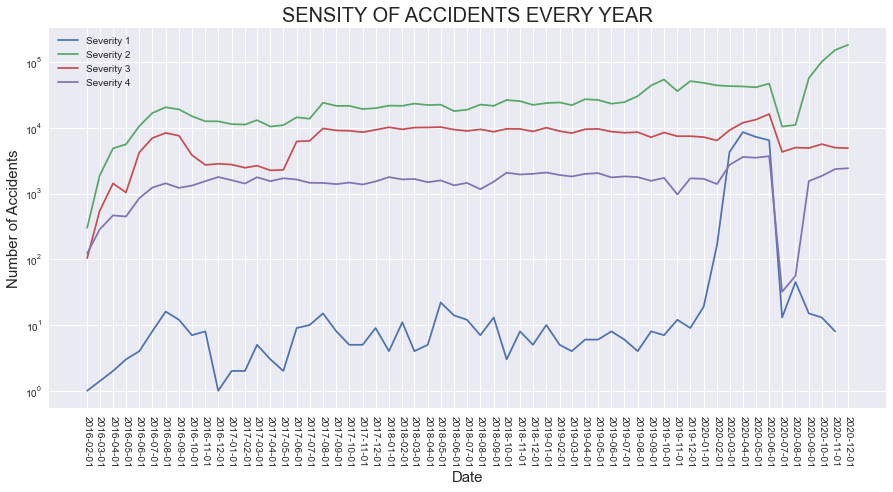

In [36]:
plt.figure(figsize=(15,7))
for i in range(1,5):
    sen = df[df['Severity'] == i].groupby(['Year', 'Month'])['ID'].count().to_frame('Count').reset_index()
    sen['Date'] = pd.to_datetime(sen[['Year', 'Month']].assign(DAY=1))
    sen = sen.drop(['Year', 'Month'], axis = 1)
    lab = 'Severity '+str(i)
    
    plt.plot(sen['Date'], sen['Count'], label=lab)

plt.yscale('log')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title('SENSITY OF ACCIDENTS EVERY YEAR', fontsize=20)
plt.xticks(sen['Date'], rotation=270)
plt.legend()
plt.show()

### Nhận xét:
- Đối với Severity = 1: Ta thấy số ca tại nạn ở Severity này rất thấp so với các ca tai nạn có mức Severity khác. Chỉ có vào khoảng tháng 3/2020 số lượng ca tại nạn ở đây mới tăng cao hơn số ca tai nạn có Severity = 4
- Đối với Severity = 2,3,4: Xu hướng của số ca tai nạn này tăng dần trong khoảng đầu năm 2016 và duy trì mức độ đều đặn.  Sau một đợt tăng mạnh từ tháng 2, giảm mạnh ở khoảng tháng 6/2020 và tăng cao lại ở tháng 8/2020
- Hầu hết các ca tai nạn đều có mức Severity là 2. Một số rất ít các ca tai nạn có mực Severity=1. Xu hướng của Severity thay đổi qua từng năm hầu như không có quy luật chung gì

## Insight 2: Điều kiện thời tiết ảnh hưởng như thế nào đến các vụ tai nạn có độ nghiêm trọng ở mức 4? Tại sao lại như thế?

In [37]:
df1 = df

In [38]:
severe_4 = df1[df1.Severity == 4]
severity_4 = severe_4.groupby(['Weather_Condition', 'Severity']).size().reset_index().drop(columns = ['Severity'])
severity_4.columns = ['Weather_Condition', 'Severity_4']
severity_4 = severity_4.sort_values(by = 'Severity_4', ascending = False)
severity_4

,Weather_Condition,Severity_4
1,Clear,19016
6,Fair,18088
45,Mostly Cloudy,12430
48,Overcast,11189
2,Cloudy,7858
...,...,...
11,Funnel Cloud,1
10,Freezing Rain / Windy,1
43,Light Thunderstorms and Snow,1
41,Light Snow with Thunder,1


<AxesSubplot:title={'center':'Top 10 Weather_Condition of Affecting Severity_4'}, xlabel='Severity_4', ylabel='Weather_Condition'>

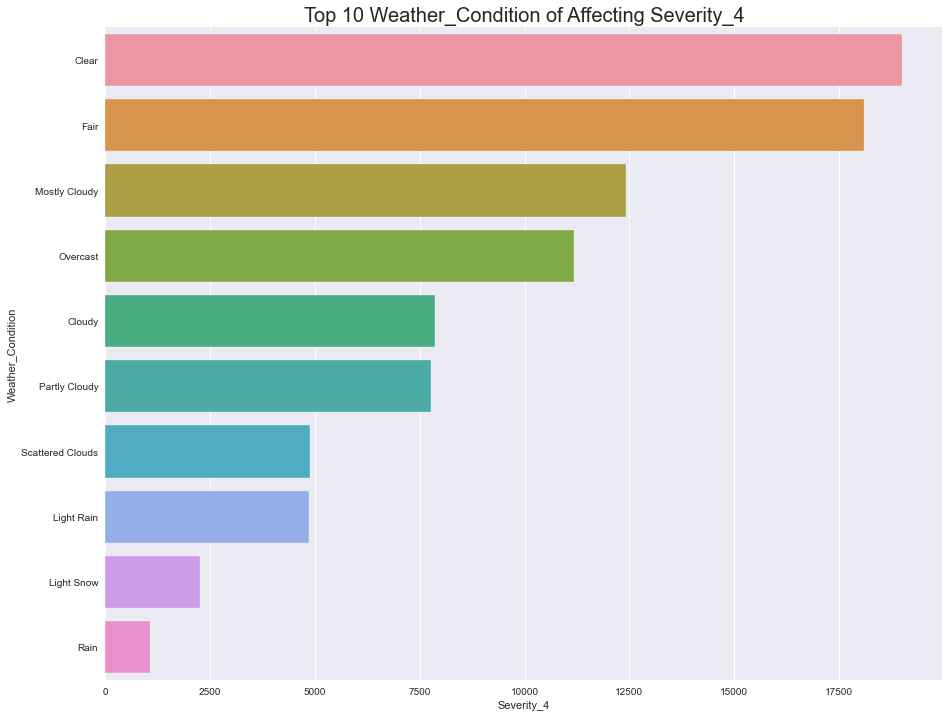

In [39]:
plt.figure(figsize = (15,12))
plt.title('Top 10 Weather_Condition of Affecting Severity_4', fontsize = 20)
sns.barplot(y='Weather_Condition', x = 'Severity_4', data = severity_4[:10])

### Nhận xét:
- Có thể thấy các vụ tai nạn có độ nghiêm trọng ở mức 4 diễn ra chủ yếu trong những điều kiện thời tiết đẹp, không có gì gây trở ngại như: Clear (trời trong), Fair (trời đẹp), Mosly Cloudy (nhiều mây). Còn trong các điều kiện thời tiết xấu như: Rain (mưa), Light Snow (có tuyết) thì số vụ tai nạn có độ nghiêm trọng ở mức 4 khá ít, không đáng kể. 

- Điều này có thể hiểu là vì khi thời tiết đẹp người tham gia giao thông sẽ có xu hướng đi ẩu hơn khi thời tiết xấu do đó mức độ nghiêm trọng của các vụ tai nạn sẽ cao hơn. Ngoài ra, khi thời tiết xấu, mọi người thường hạn chế ra đường khi không thật sự cần thiết vì vậy cũng ít xảy ra các vụ tai nạn hơn.

## Insight 3: Đâu là các khu vực thường xuyên xảy ra tai nạn. Có sự khác nhau qua từng năm giữa các khu vực này hay không ? (hay là năm nào cũng xảy ra tai nạn ở khu vực này)

### State

Text(0.5, 1.0, 'STATE WITH NUMBER OF ACCIDENTS')

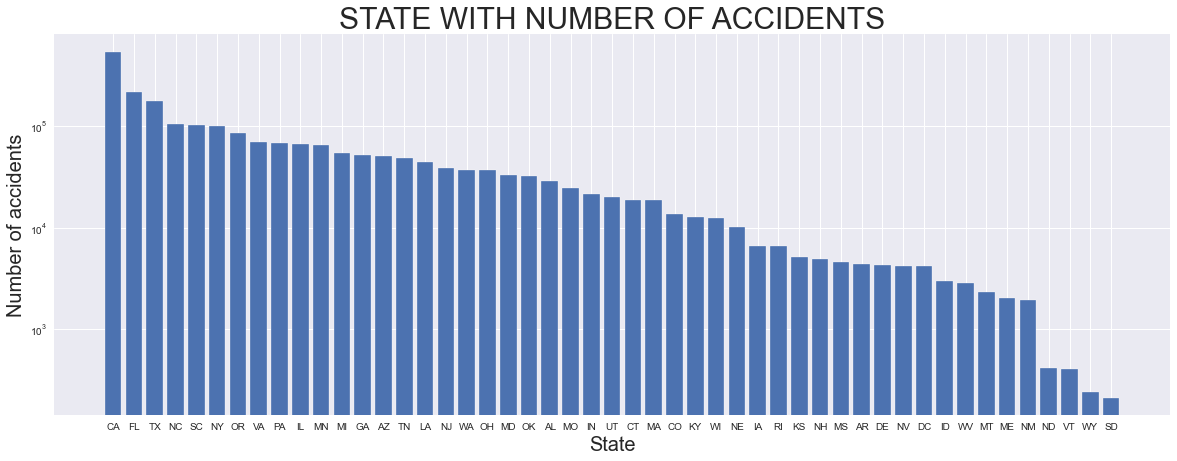

In [40]:
state = df['State'].value_counts()
topstate=state.index

plt.figure(figsize=(20,7))
plt.bar(state.index, state.values)
plt.yscale('log')
plt.xlabel('State', fontsize = '20')
plt.ylabel('Number of accidents', fontsize = '20')
plt.title('STATE WITH NUMBER OF ACCIDENTS', fontsize = '30')


#### Nhận xét:
- Có thể thấy 3 bang California(CA), Florida(FL) và Texas(TX) là top 3 bang có số lượng tai nạn giao thông cao nhất và dẫn đầu là California. Điều này có thể dễ hiểu bởi vì đây là 3 bang có dân số dẫn đầu Mỹ. Điều khá bất ngờ là ở Texas có dân số cao hơn nhưng số ca tai nạn giao thông lại ít hơn so với Florida
- Có thể thấy Wyoming(WY) và South Dakota(SD) là 2 bang có số lượng tai nạn giao thông thấp nhất
- Có thể thấy 3 bang có số lượng tai nạn giao thông cao trên $10^5$ và 4 bang có số lượng tai giao thông thấp hơn $10^3$

### City

Do số lượng thành phố quá nhiều nên ở đây ta chỉ xét đến top 10 thành phố có số lượng tai nạn giao thông cao nhất

Text(0.5, 1.0, 'TOP 10 CITY HAVE NUMBER OF ACCIDENTS LARGEST')

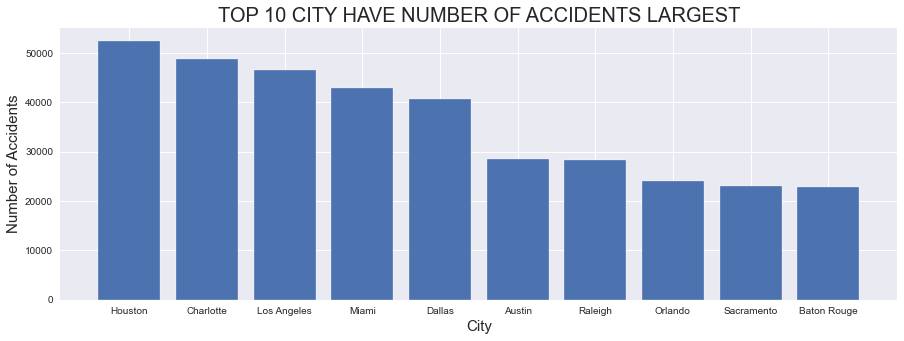

In [41]:
city = df['City'].value_counts()

plt.figure(figsize=(15,5))
plt.bar(city.index[:10], city.values[:10])
plt.xlabel('City', fontsize = '15')
plt.ylabel('Number of Accidents', fontsize = '15')
plt.title('TOP 10 CITY HAVE NUMBER OF ACCIDENTS LARGEST', fontsize = '20')

#### Nhận xét:
- Houston, Charlotte, Los Angeles là 3 thành phố có số ca tai nạn giao thông cao nhất và dẫn đầu là Houston. 3 thành phố này có số ca tai nạn giao thông gấp đôi các thành phố nằm ở top 10 là Baton Rougue.
- Mặc dù bang North Carolina(NC) nằm ở thứ 4 trong những bang có số ca tai nạn giao thông cao nhất nhưng thành phố Charlotte của bang này lại xếp thứ 2 trong số các thành phố có số ca tai nạn lớn nhất, trái ngược với thành phố Miami của bang Florida


### Street

Text(0.5, 1.0, 'TOP 10 STREET HAVE NUMBER OF ACCIDENTS LARGEST')

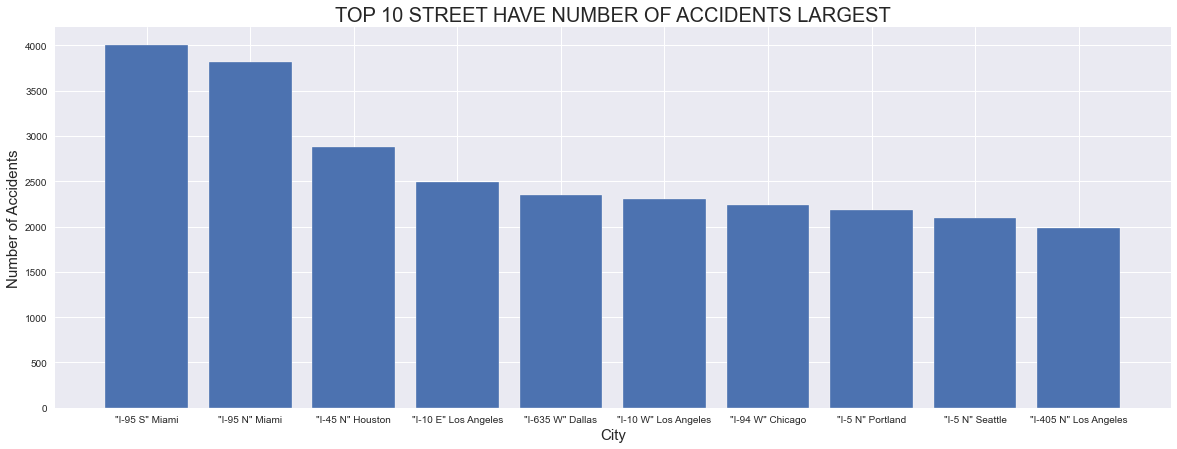

In [42]:
streets = '"' +df['Street'] + '" '+ df['City']
street = streets.value_counts()
top3_street = street[:3]

plt.figure(figsize=(20,7))
plt.bar(street.index[:10], street.values[:10])
plt.xlabel('City', fontsize = '15')
plt.ylabel('Number of Accidents', fontsize = '15')
plt.title('TOP 10 STREET HAVE NUMBER OF ACCIDENTS LARGEST', fontsize = '20')

#### Nhận xét:
- Điều khá đặc biệt là mặc dù nằm ở Top 3 thành phố có số ca tai nạn giao thông cao nhất nhưng Charlotte lại không có đường nào nằm trong top 10 những đường có số ca tai nạn giao thông lớn nhất
- Đường I95-S và I95-N của Miami và I-45N của Houston là 3 con đường có số ca tai nạn giao thông lớn nhất
- Mặc dù chỉ xếp thứ 4 trong top các thành phố nhưng mà Miami lại có tới 2 con đường với số ca tai nạn giao thông dẫn đầu. Houston là thành phố có số ca tai nạn giao thông lớn nhất nhưng chỉ có 1 con đường nằm trong top này

### Sự khác nhau qua từng năm

Qua các bước khám phá dữ liệu ở trên ta có thể thấy đường "I-45 N" ở bang Houston, đường "I-95 N" và "I-95 S" ở bang Miami là 3 con đường có số ca tai nạn giao thông cao nhất. Vì vậy ở đây ta xem xét số ca tai nạn ở 3 con đường này qua từng năm

In [43]:
df['Year'] = df['Start_Time'].dt.year
df['StreetvsCity'] = '"' + df['Street'] + '" '+ df['City']
street_year = df.groupby(['Year', 'StreetvsCity'], as_index=False)['ID'].count()

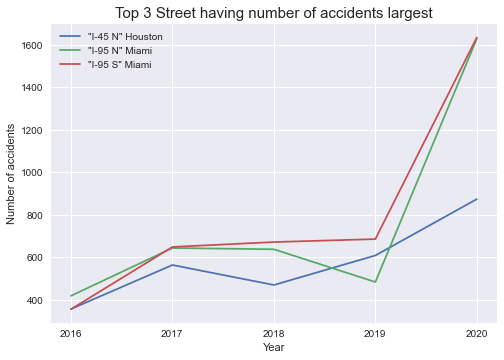

In [44]:
top3street_year = street_year[street_year['StreetvsCity'].isin(top3_street.index)]
I45N = top3street_year[top3street_year['StreetvsCity'] == '"I-45 N" Houston']
I95N = top3street_year[top3street_year['StreetvsCity'] == '"I-95 N" Miami']
I95S = top3street_year[top3street_year['StreetvsCity'] == '"I-95 S" Miami']

plt.plot(top3street_year['Year'].unique(), I45N['ID'], label='"I-45 N" Houston')
plt.plot(top3street_year['Year'].unique(), I95N['ID'], label='"I-95 N" Miami')
plt.plot(top3street_year['Year'].unique(), I95S['ID'], label='"I-95 S" Miami')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Top 3 Street having number of accidents largest', fontsize = '15')
plt.xticks(top3street_year['Year'].unique())
plt.show()

#### Nhận xét:
- Có thể thấy số ca tai nạn của 3 con đường này đều tăng từ năm 2016-2017 tăng mạnh từ nằm 2019-2020. "I-95N" có số ca tai nạn giảm mạnh trong khoảng 2017-2019 nhưng đến năm 2020 vẫn tăng mạnh

**Ảnh hưởng của yếu tố thời tiết**

Text(0.5, 1.0, 'Effect of Weather Condition to accident in street I95-S')

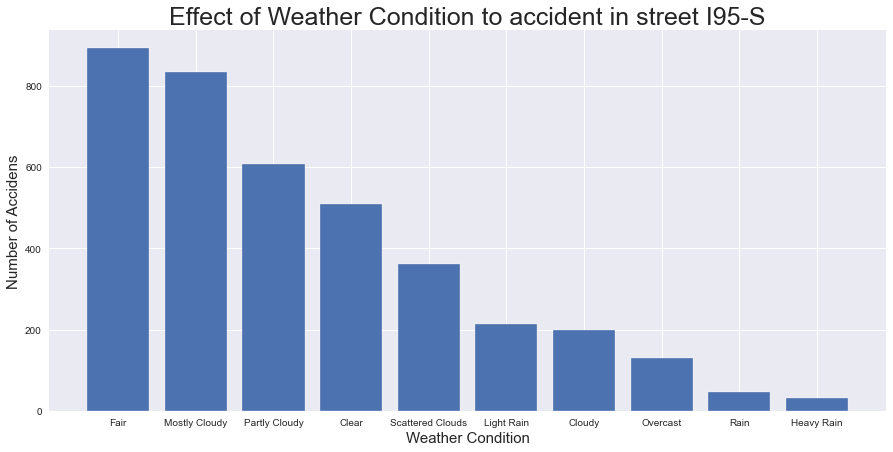

In [45]:
I95S_cause = df[df['StreetvsCity'] == '"I-95 S" Miami']['Weather_Condition'].value_counts().reset_index()

plt.figure(figsize=(15,7))
plt.bar(I95S_cause['index'][:10], I95S_cause['Weather_Condition'][:10])
plt.xlabel('Weather Condition', fontsize = 15)
plt.ylabel('Number of Accidens', fontsize = 15)
plt.title('Effect of Weather Condition to accident in street I95-S', fontsize = 25)


- Có thể thấy yếu tố thời tiết không tác động quá lớn đến số ca tai nạn giao thông. Nguyên nhân số ca tai nạn giao thông nhiều có thể là do sự tăng số lượng phương tiện giao thông do kinh tế phát triển, đồng thời với việc ý thức của người dân chưa chấp hành giao thông tốt dẫn đến việc số ca tai nạn giao thông đặc biệt cao như vậy

## Insight 4: Phân tích số ca tai nạn giao thông xảy ra trong các khoảng thời gian. Phân tích khoảng thời gian(giờ nào, thứ mấy) cần chú ý khi ra đường.

Text(0.5, 1.0, 'ACCIDENTS BY WEEK DAY')

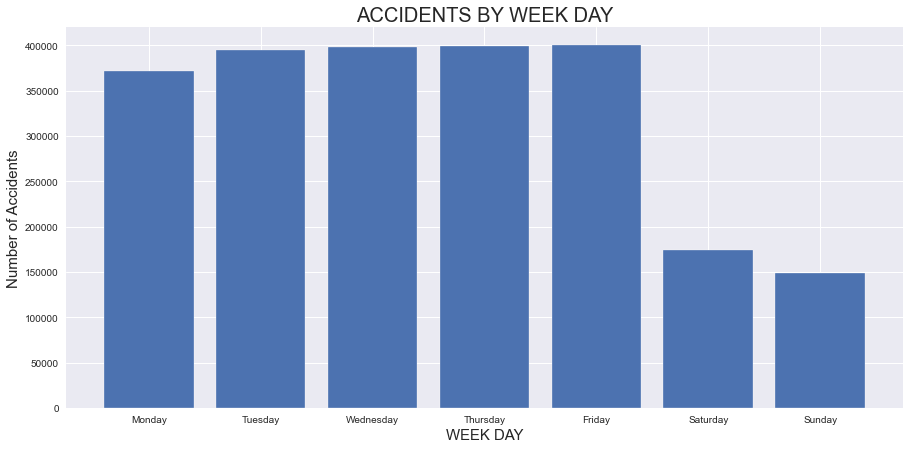

In [46]:
df4 = df
Week_day = ["Monday" , "Tuesday" ,"Wednesday" ,"Thursday" ,"Friday" ,"Saturday" ,"Sunday"]
df4["Weekday"] = df4["Start_Time"].dt.weekday

#get data group by WEEK DAY
df_weekday  = df4.groupby(['Weekday']).size().reset_index(name='counts')
df_weekday.sort_values(by=['Weekday'],ascending=False)  
df_weekday["Week_day"] = Week_day
df_weekday = df_weekday.drop(["Weekday"],axis = 1)
df_weekday

plt.figure(figsize=(15,7))
plt.bar(df_weekday.Week_day[:10], df_weekday.counts[:10])
plt.xlabel('WEEK DAY', fontsize = '15')
plt.ylabel('Number of Accidents', fontsize = '15')
plt.title('ACCIDENTS BY WEEK DAY', fontsize = '20')


Text(0.5, 1.0, 'ACCIDENTS BY DAY IN 04-2019')

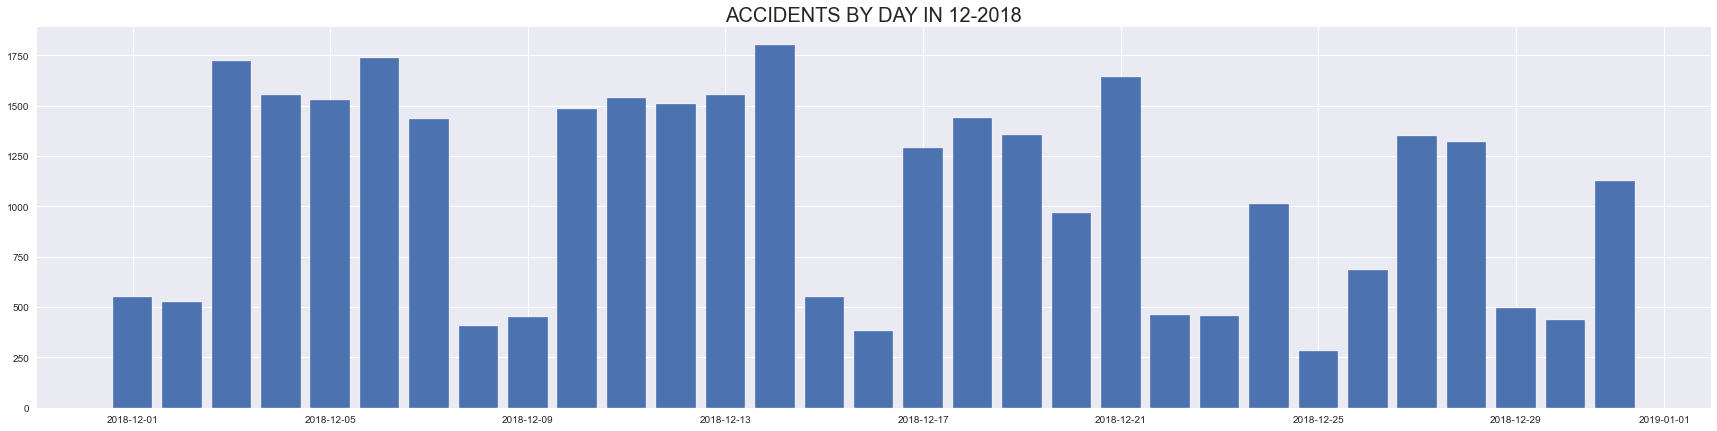

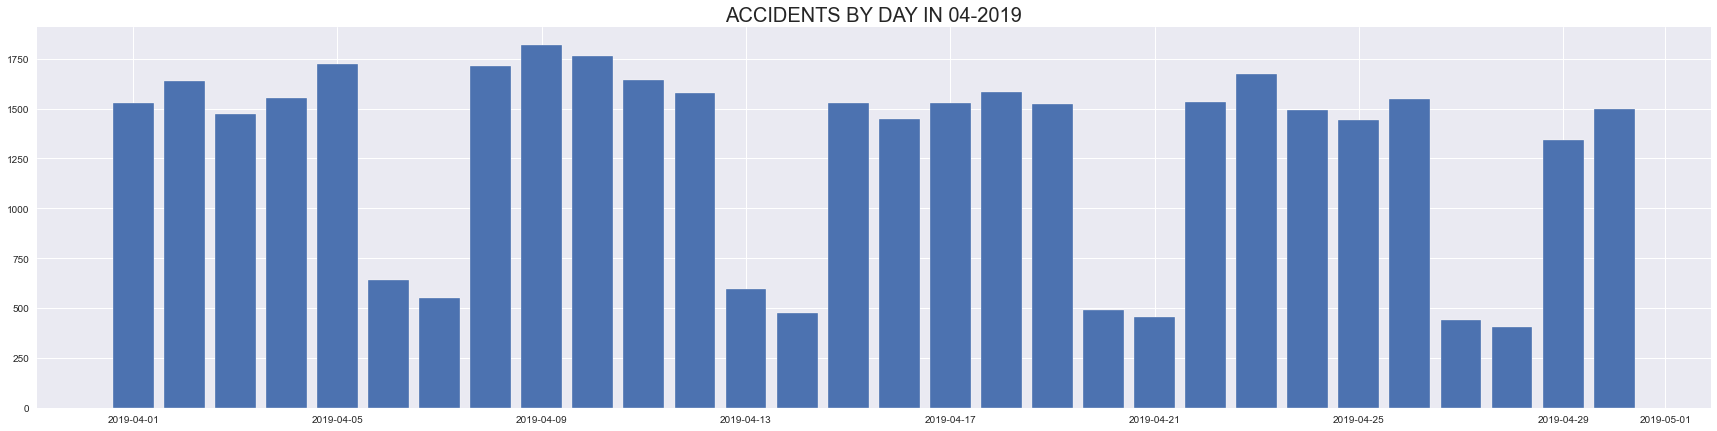

In [47]:
df4 = df
df4["Date"] = df4["Start_Time"].dt.date
df4["Month"] = df4["Start_Time"].dt.month
df4["Year"] = df4["Start_Time"].dt.year

df4  = df4.groupby(['Date',"Month","Year"]).size().reset_index(name='counts')
df4 = df4.sort_values(by=['Date'],ascending=False)

#chart accident by day in 12-2018
df_12_2018 = df4[(df4["Month"] == 12 ) & (df4["Year"] == 2018)].drop(['Month', 'Year'], axis=1)
df_12_2018['Date'] =  pd.to_datetime(df_12_2018['Date'])
plt.figure(figsize=(30,7))
plt.bar(df_12_2018.Date[:32], df_12_2018.counts[:32])
plt.title('ACCIDENTS BY DAY IN 12-2018', fontsize = '20')
          
#chart accident by day in 04-2019    
df_04_2019 = df4[(df4["Month"] == 4 ) & (df4["Year"] == 2019)].drop(['Month', 'Year'], axis=1)
df_04_2019['Date'] =  pd.to_datetime(df_04_2019['Date'])
plt.figure(figsize=(30,7))
plt.bar(df_04_2019.Date[:32], df_04_2019.counts[:32])
plt.title('ACCIDENTS BY DAY IN 04-2019', fontsize = '20')          

### Nhận xét:
   - Qua biểu đồ `ACCIDENTS BY WEEK DAY` thể hiện số ca tai nạn giao thông theo các ngày trong tuần, ta thấy số ca tai nạn giao thông của các ngày cuối tuần ít hơn hẳn so với các ngày trong tuần.
   - Ở biểu đồ `Accident by day in 04-2019 và 12-2018` cho thấy số ca tai nạn giao thông theo ngày lặp lại theo chu kì, đó là cao ở các ngày trong tuần và giảm ở các ngày cuối tuần.

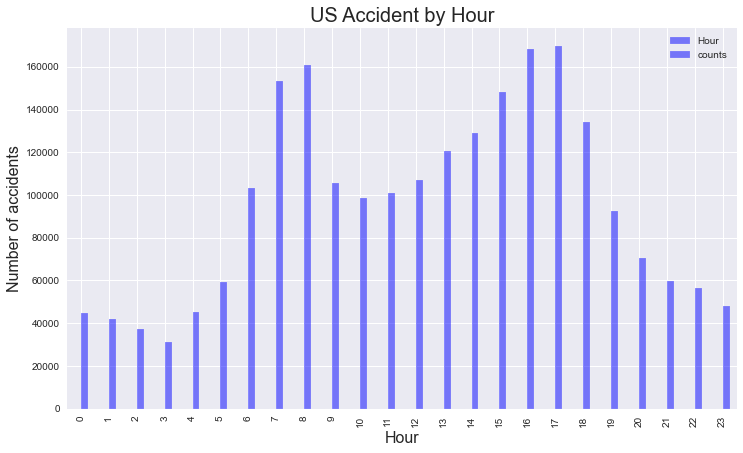

In [48]:
df4 = df
df.head()
df4["Hour"] = df4["Start_Time"].dt.hour
df4  = df4.groupby(['Hour']).size().reset_index(name='counts')
df4
df4.sort_values(by=['Hour'],ascending=False)  


df4.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)
# title and x,y labels
plt.title('US Accident by Hour', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

([<matplotlib.patches.Wedge at 0x1c3b4dd0460>,
 [Text(0.9428064821063291, -0.7095885690301728, 'Accidents in Day'),
  Text(-0.8788873985736971, 0.6614808694349061, 'Accidents in Night')])

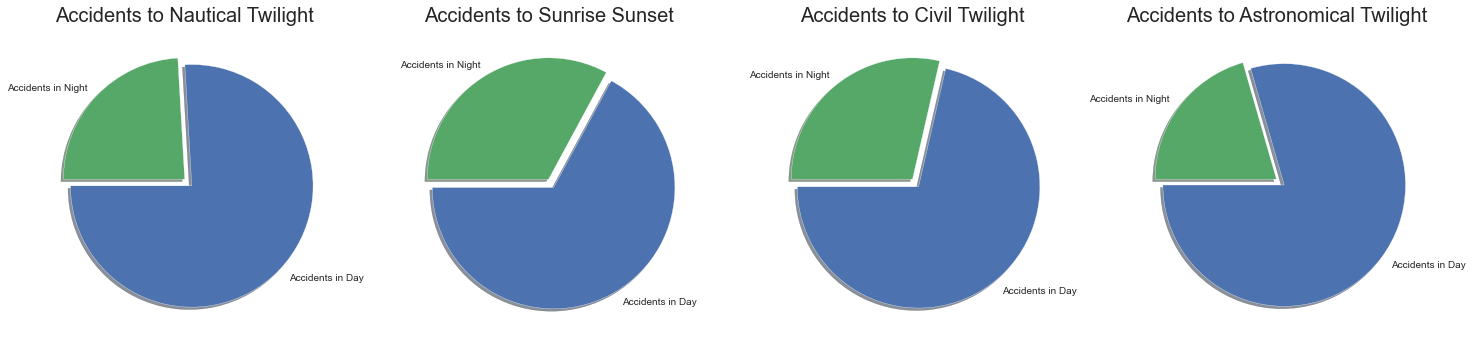

In [49]:

#Accidents to Nautical Twilight pie chart
df4 = df
df_Nautical_Twilight_accident = df4.groupby("Nautical_Twilight").size().reset_index(name='counts')
plt.figure(figsize=(25,20))
plt.subplot(1, 4, 1)
plt.title('Accidents to Nautical Twilight',fontsize=20)
explode=(0.08,0)
plt.pie(df_Nautical_Twilight_accident.counts,labels=['Accidents in Day','Accidents in Night'],startangle=180,shadow = True,explode = explode)

#Accidents to Sunrise Sunset pie chart
df_Sunrise_Sunset_accident = df4.groupby("Sunrise_Sunset").size().reset_index(name='counts')
plt.subplot(1, 4, 2)
plt.title('Accidents to Sunrise Sunset',fontsize=20)
explode=(0.08,0)
plt.pie(df_Sunrise_Sunset_accident.counts,labels=['Accidents in Day','Accidents in Night'],startangle=180,shadow = True,explode = explode)

#Accidents to Civil Twilight pie chart
df_Civil_Twilight_accident = df4.groupby("Civil_Twilight").size().reset_index(name='counts')
plt.subplot(1, 4, 3)
plt.title('Accidents to Civil Twilight',fontsize=20)
explode=(0.08,0)
plt.pie(df_Civil_Twilight_accident.counts,labels=['Accidents in Day','Accidents in Night'],startangle=180,shadow = True,explode = explode)


#Accidents to Astronomical Twilight pie chart
df_Astronomical_Twilight_accident = df4.groupby("Astronomical_Twilight").size().reset_index(name='counts')
plt.subplot(1, 4, 4)
plt.title('Accidents to Astronomical Twilight',fontsize=20)
explode=(0.08,0)
plt.pie(df_Astronomical_Twilight_accident.counts,labels=['Accidents in Day','Accidents in Night'],startangle=180,shadow = True,explode = explode)


### Nhận xét:
   - Qua biểu đồ `US Accident by Hour` ta thấy số ca tai nạn giao thông vào ban ngày nhiều hơn so với số ca tai nạn giao thông vào ban đêm
   - Qua các biểu đồ pie chart thể hiện số lượng ca tai nạn giao thông vào ban ngày chiếm 75% trong tổng số còn số ca vào ban đêm chiếm 25% so với tổng số

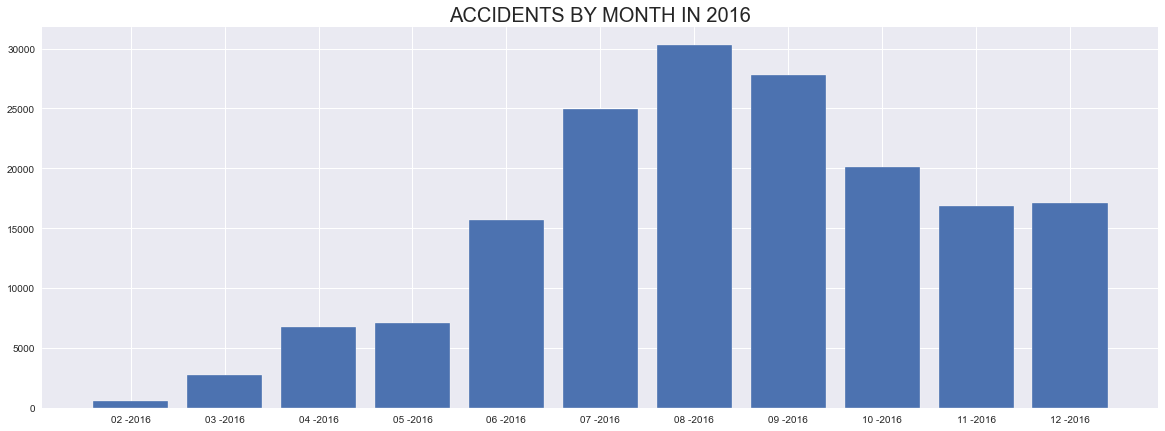

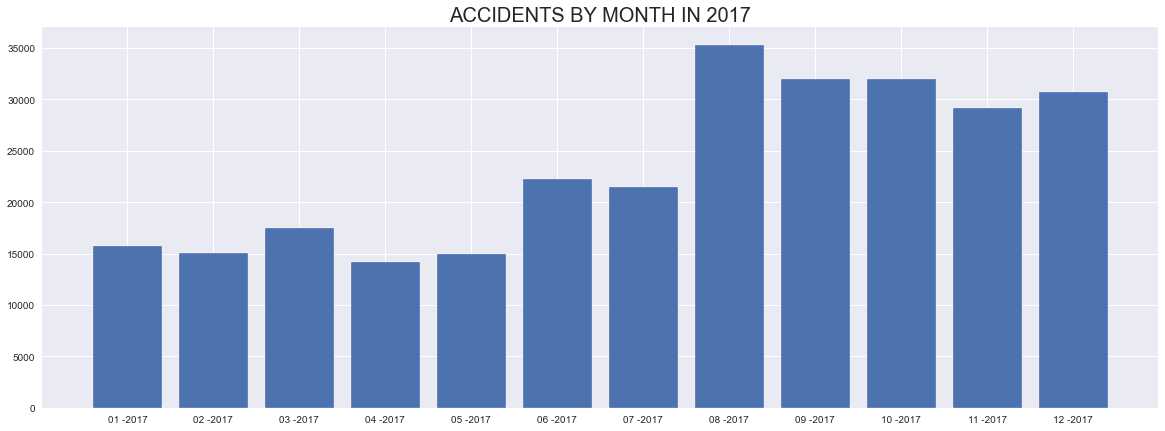

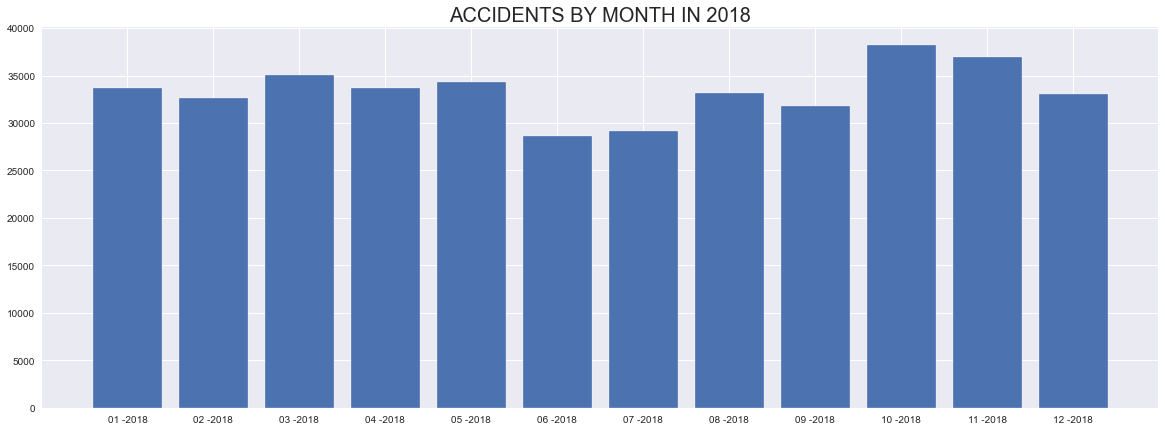

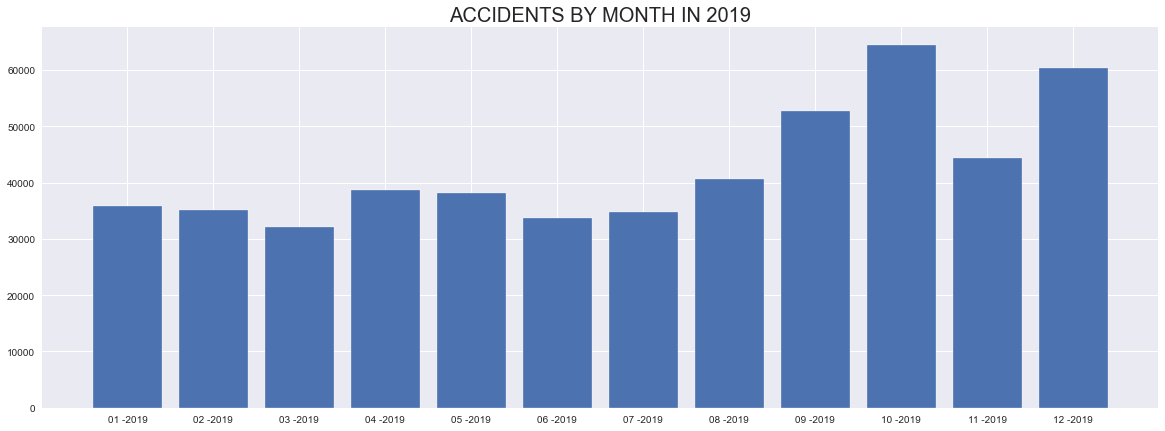

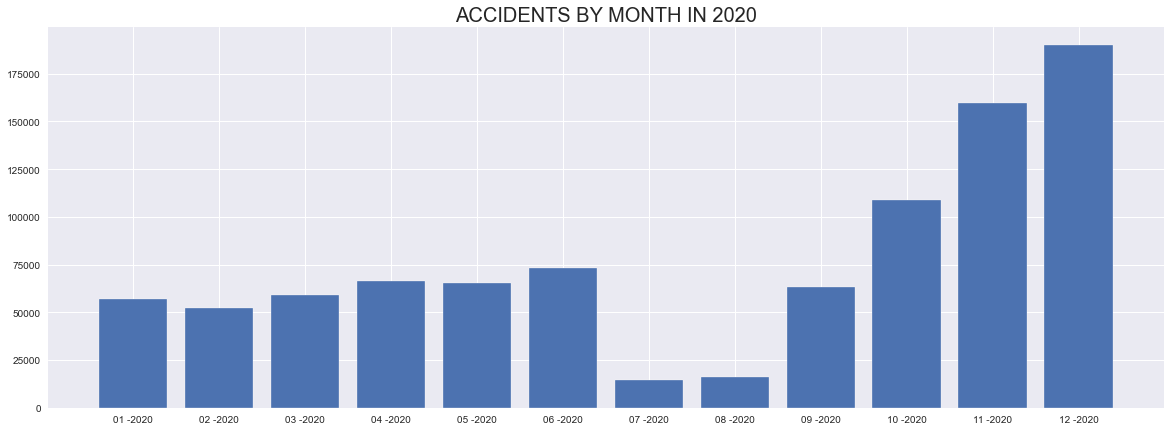

In [50]:
df4 = df

df4["month_year"] = df4["Start_Time"].dt.to_period('M')

df4["Year"] = df4["Start_Time"].dt.year

data_by_month  = df4.groupby(['month_year',"Year"]).size().reset_index(name='counts')
data_by_month["month_year"] = data_by_month["month_year"].apply(lambda x: x.strftime('%m -%Y'))

for year in range(2015,2020):
    data_by_year = data_by_month[data_by_month["Year"] == year + 1]
    plt.figure(figsize=(20,7))
    plt.bar(data_by_year.month_year[:12], data_by_year.counts[:12])
    plt.title('ACCIDENTS BY MONTH IN ' + str(year + 1 ), fontsize = '20')


### Nhận xét:
  - Ở biểu đồ `ACCIDENTS BY MONTH` thể hiện số ca tai nạn giao thông theo tháng qua các năm từ 2016 - 2020 , ta thấy số ca tai nạn giao thông tăng cao hơn kể từ tháng 8 hàng năm

### Nhận xét chung insight 4:
   - Sự khác biệt về số ca tai nạn giao thông giữa trong tuần và cuối tuần cũng như giữa ngày và đêm có thể là do lượng xe lưu thông khác nhau (ban ngày > ban đêm , trong tuần > cuối tuần)
   - Vì vậy cần chú ý lái xe vào các ngày trong tuần và vào buổi sáng vì lúc này lưu lượng xe lưu thông khá đông.

## Insight 5: Số vụ tai nạn từ tháng 3 đến tháng 12 qua từng năm có gì khác nhau? Năm nào là nhiều nhất? Tại sao lại như vậy?

In [51]:
df1['Start_Time'] = pd.to_datetime(df1['Start_Time'])
df1['End_Time'] = pd.to_datetime(df1['End_Time'])

In [52]:
df1['Temp'] = df1[df1['Start_Time'].dt.month >= 3]['Start_Time'].dt.year

In [53]:
accidents = df1['Temp'].value_counts().to_frame().reset_index()
accidents.columns = ['Year', 'Accidents_Count']
accidents['Year'] = accidents['Year'].astype('int')
accidents

,Year,Accidents_Count
0,2020,816449
1,2019,439747
2,2018,333903
3,2017,249543
4,2016,169342


<AxesSubplot:title={'center':'Accidents Count per year'}, xlabel='Year', ylabel='Accidents_Count'>

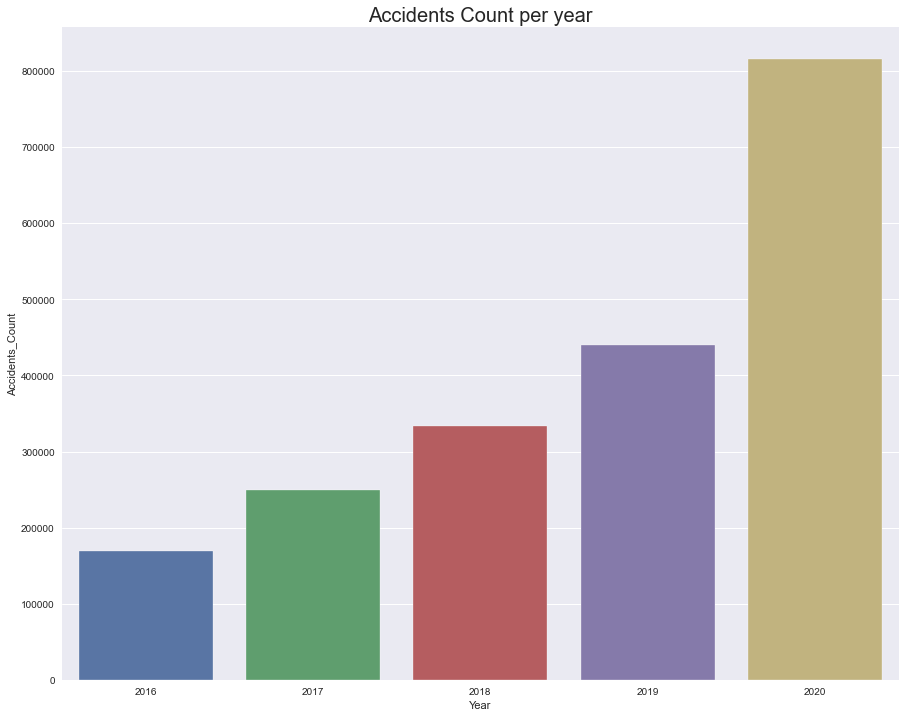

In [54]:
plt.figure(figsize = (15,12))
plt.title('Accidents Count per year', fontsize = 20)
sns.barplot(x='Year', y = 'Accidents_Count', data = accidents)

### Nhận xét:
- Qua biểu đồ ta thấy được số vụ tai nạn giao thông ở Mỹ từ tháng 3 đến tháng 12 tăng dần qua từng năm nhưng tăng mạnh nhất ở năm 2020 (816449 vụ), gần gấp đôi số vụ tai nạn ở năm 2019 (439747 vụ). 

- Theo như các thông tin trên báo mạng thì khoảng thời gian từ tháng 3 năm 2020 ở Mỹ bắt đầu thực hiện cách ly xã hội phòng chống dịch Covid 19 cùng với đó là các lệnh đóng cửa do đó lưu lượng giao thông bị giảm, điều này đã làm những người tham gia giao thông chủ quan thấy đường vắng vẻ nên chạy quá tốc độ, vượt ẩu vì vậy mà số vụ tai nạn giao thông đã tăng lên rất nhiều.

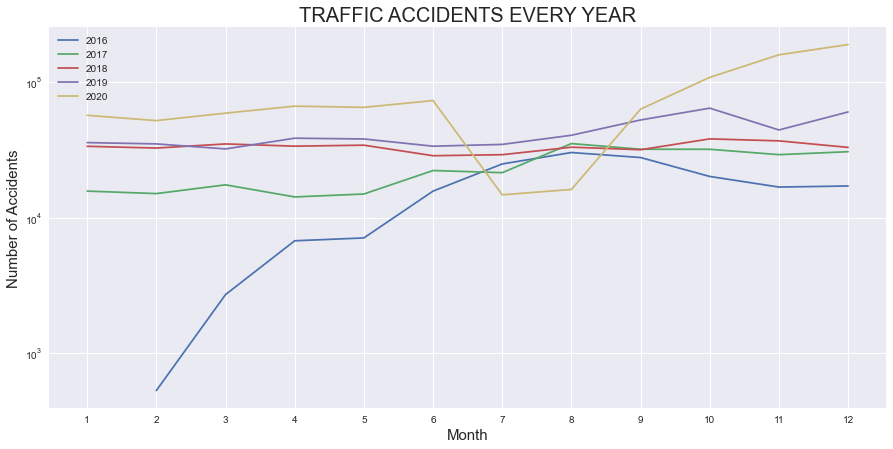

In [55]:
plt.figure(figsize=(15,7))

total = df.groupby(['Year', 'Month'])['ID'].count().to_frame('Count').reset_index()
for i in range(2016,2021):
    year = total[total['Year'] == i]
    lab = str(i)
    plt.plot(year['Month'], year['Count'], label = lab)

plt.yscale('log')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title('TRAFFIC ACCIDENTS EVERY YEAR', fontsize=20)
plt.xticks(year['Month'])
plt.legend()
plt.show()

### Nhận xét:

Nhìn chung thì số vụ tai nạn của từng tháng từ tháng 3 đến tháng 12 ở năm 2020 cao hơn nhiều so với các năm khác (chỉ có tháng 7 và tháng 8 thấp hơn) và hầu hết các tháng đều có số vụ tai nạn tăng dần qua từng năm. Cụ thể:
- Ở tháng 3: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất
- Ở tháng 4: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất
- Ở tháng 5: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất
- Ở tháng 6: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất
- Ở tháng 7: số vụ tai nạn của năm 2019 là cao nhất, 2020 là thấp nhất
- Ở tháng 8: số vụ tai nạn của năm 2019 là cao nhất, 2020 là thấp nhất
- Ở tháng 9: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất
- Ở tháng 10: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất
- Ở tháng 11: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất
- Ở tháng 12: số vụ tai nạn của năm 2020 là cao nhất, 2016 là thấp nhất

## Insight 6: Phân tích tương quan và nhân quả  của mức độ nghiêm trọng (severity) và khoảng cách của vụ tai nạn

In [56]:
df_7 = df

df_7 = df_7[["Distance(mi)","Severity"]]
df_7["Distance"] = df_7["Distance(mi)"]
df_7_s_1 = df_7[df_7["Severity"] == 1]
df_7_s_2 = df_7[df_7["Severity"] == 2]
df_7_s_3 = df_7[df_7["Severity"] == 3]
df_7_s_4 = df_7[df_7["Severity"] == 4]

divide = 10

#1
distance_max = df_7_s_1["Distance"].max()
distance_min = df_7_s_1["Distance"].min()
range_s_1 = [None] * divide
for i in range (0 , divide):
    range_s_1[i] = float("{:.3f}".format(distance_min + (distance_max - distance_min )/ divide * i))


#2
distance_max = df_7_s_2["Distance"].max()
distance_min = df_7_s_2["Distance"].min()
range_s_2 = [None] * divide
for i in range (0 , divide):
    range_s_2[i] = float("{:.3f}".format(distance_min + (distance_max - distance_min )/ divide * i))

#3
distance_max = df_7_s_3["Distance"].max()
distance_min = df_7_s_3["Distance"].min()
range_s_3 = [None] * divide
for i in range (0 , divide):
    range_s_3[i] = float("{:.3f}".format(distance_min + (distance_max - distance_min )/ divide * i))

#4
distance_max = df_7_s_4["Distance"].max()
distance_min = df_7_s_4["Distance"].min()
range_s_4 = [None] * divide
for i in range (0 , divide):
    range_s_4[i] = float("{:.3f}".format(distance_min + (distance_max - distance_min )/ divide * i))

<ipython-input-56-8a6eaa1432c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7["Distance"] = df_7["Distance(mi)"]


(array([2.6476e+04, 4.3000e+02, 1.5400e+02, 6.2000e+01, 3.7000e+01,
       8.0000e+00, 7.0000e+00, 0.0000e+00, 1.0000e+00]), array([ 0.   ,  2.46 ,  4.921,  7.381,  9.841, 12.302, 14.762, 17.222,
       19.682, 22.143]), <BarContainer object of 9 artists>)
(array([1.743051e+06, 4.960000e+02, 1.010000e+02, 2.700000e+01,
       1.300000e+01, 4.000000e+00, 1.000000e+01, 2.000000e+00,
       2.000000e+00]), array([  0.   ,  15.519,  31.037,  46.556,  62.074,  77.593,  93.112,
       108.63 , 124.149, 139.667]), <BarContainer object of 9 artists>)
(array([4.20931e+05, 1.00000e+02, 2.90000e+01, 8.00000e+00, 1.20000e+01,
       1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]), array([  0.   ,  15.152,  30.305,  45.457,  60.61 ,  75.763,  90.915,
       106.067, 121.22 , 136.373]), <BarContainer object of 9 artists>)
(array([9.3741e+04, 5.7200e+02, 1.9700e+02, 3.7000e+01, 1.9000e+01,
       1.5000e+01, 4.0000e+00, 2.0000e+00, 3.0000e+00]), array([  0.   ,  13.856,  27.712,  41.569,  55.425

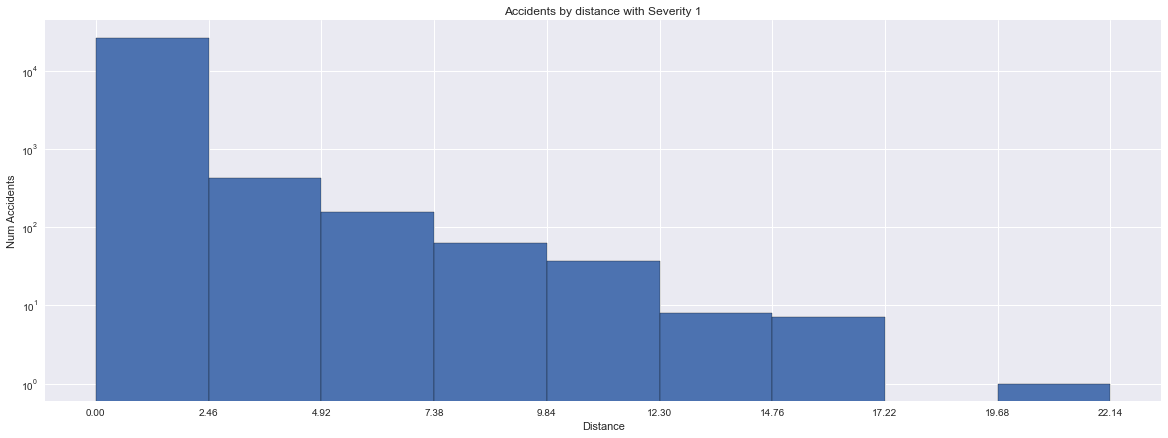

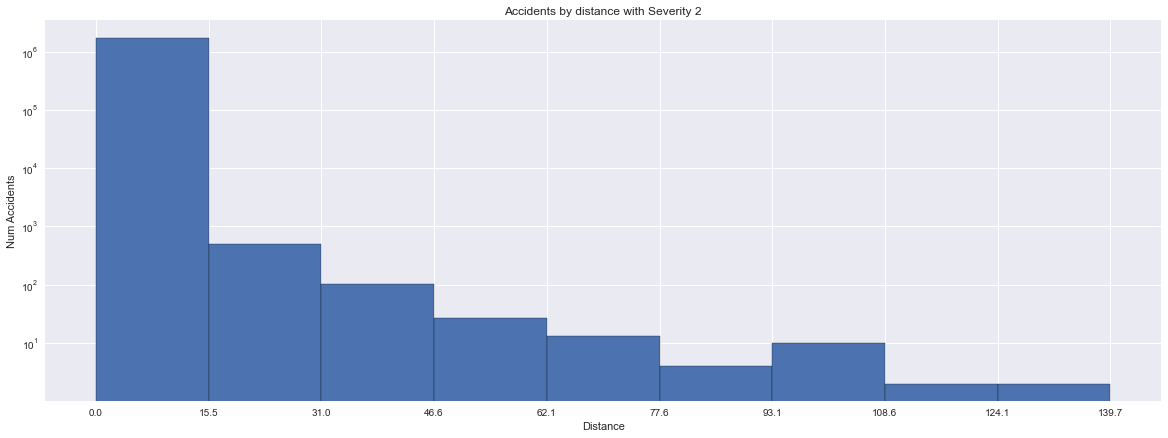

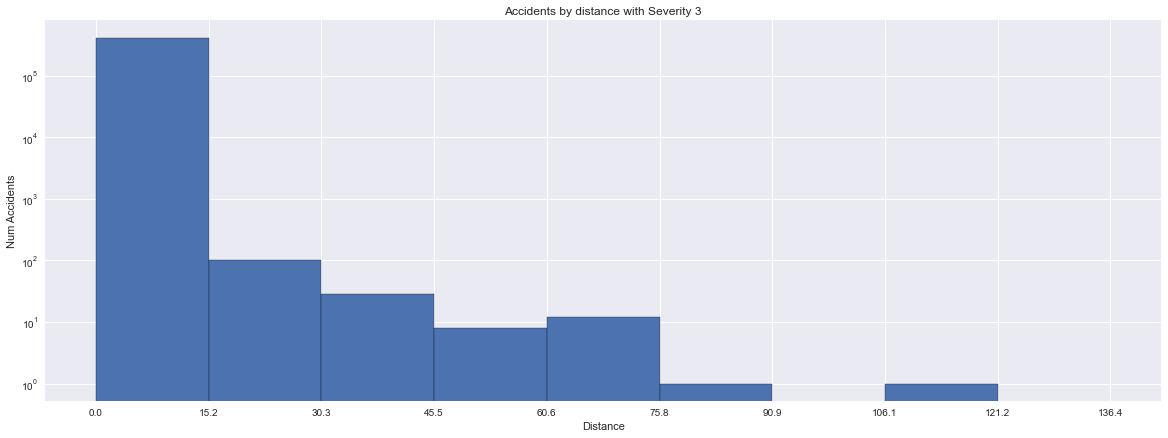

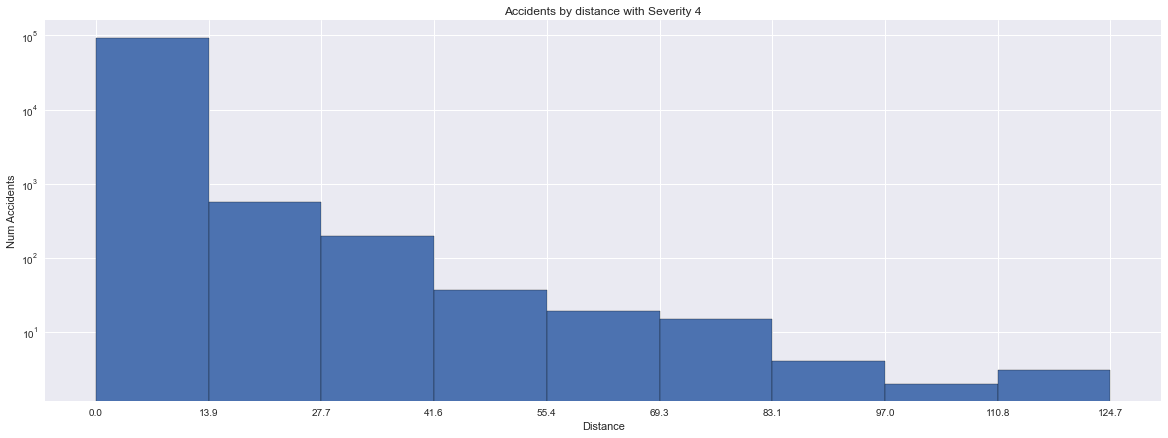

In [57]:

#1
plt.figure(figsize=(20,7))
hist = plt.hist(df_7_s_1['Distance'], bins=range_s_1, 
                edgecolor='black')
plt.yscale('log')
plt.title('Accidents by distance with Severity 1')
plt.xlabel('Distance')
plt.ylabel('Num Accidents')
plt.xticks(hist[1]);
print(hist)


#2

plt.figure(figsize=(20,7))
hist = plt.hist(df_7_s_2['Distance'], bins=range_s_2, 
                edgecolor='black')
plt.yscale('log')
plt.title('Accidents by distance with Severity 2')
plt.xlabel('Distance')
plt.ylabel('Num Accidents')
plt.xticks(hist[1]);
print(hist)

#3
plt.figure(figsize=(20,7))
hist = plt.hist(df_7_s_3['Distance'], bins=range_s_3, 
                edgecolor='black')
plt.yscale('log')
plt.title('Accidents by distance with Severity 3')
plt.xlabel('Distance')
plt.ylabel('Num Accidents')
plt.xticks(hist[1]);
print(hist)

#4
plt.figure(figsize=(20,7))

hist = plt.hist(df_7_s_4['Distance'], bins=range_s_4, 
                edgecolor='black')
plt.yscale('log')
plt.title('Accidents by distance with Severity 4')
plt.xlabel('Distance')
plt.ylabel('Num Accidents')
plt.xticks(hist[1]);
print(hist)


In [58]:
df_7_s_1_instance = df_7[(df_7["Severity"] == 1) & (df_7["Distance"] == 0)]
df_7_s_2_instance = df_7[(df_7["Severity"] == 2) & (df_7["Distance"] == 0)]
df_7_s_3_instance = df_7[(df_7["Severity"] == 3) & (df_7["Distance"] == 0)]
df_7_s_4_instance = df_7[(df_7["Severity"] == 4) & (df_7["Distance"] == 0)]

df_7_s_1_i_p = len(df_7_s_1_instance) / len(df_7_s_1) *100
df_7_s_2_i_p = len(df_7_s_2_instance) / len(df_7_s_2) *100
df_7_s_3_i_p = len(df_7_s_3_instance) / len(df_7_s_3)*100
df_7_s_4_i_p = len(df_7_s_4_instance) / len(df_7_s_4)*100


data_instance = {"Severity" :["Severity 1" ,"Severity 2","Severity 3","Severity 4" ] ,
                 "Instance Accident Percent" :[df_7_s_1_i_p,df_7_s_2_i_p,df_7_s_3_i_p,df_7_s_4_i_p] ,
                 "Max distance":[df_7_s_1["Distance"].max(),df_7_s_2["Distance"].max(),df_7_s_3["Distance"].max(),df_7_s_4["Distance"].max()]}
data_instance = pd.DataFrame.from_dict(data_instance)
data_instance

,Severity,Instance Accident Percent,Max distance
0,Severity 1,89.268239,24.603
1,Severity 2,55.071600,155.186
2,Severity 3,76.275224,151.525
3,Severity 4,7.267076,138.562


### Nhận xét :
   - Ở thống kê trên ta thấy các vụ tai nạn với Severity 1 thì khoảng cách vụ tai nạn được ghi nhận xa nhất là 24.6 thấp hơn nhiều so với mức Severity 2,3,4 (lần lượt là 155.186, 151.525, 138.562).
   - Tỉ lệ tai nạn mà khoảng cách ảnh hưởng bằng 0 (tai nạn xảy ra tại chỗ) của mức Severity 1 khá cao 89.26% còn ở Serverity 4 khá thấp 7.11% cho thấy các vụ có mức độ nghiêm trọng bằng 4 thì ít khi xảy ra tại chỗ.
   - Nhưng ở biểu đồ `Accidents by distance with Severity 1,2,3,4` lại biểu hiện rằng số ca tai nạn giao thông diễn ra nhiều ở khoảng cách gần.
#### => Chưa thể kết luận về tính tương quan cũng như nhân quả giữa khoảng cách vụ tai nạn (distance) và mức độ nghiêm trọng (serverity)

## Insight 7: Đưa ra giải pháp giảm tai nạn giao thông cho các tuyến đường thường xuyên xảy ra tai nạn

#### Top 5 tuyến đường xảy ra tai nạn


In [59]:
df_groupby_street = df.groupby(['Street']).size().reset_index(name='counts')
df_groupby_street = df_groupby_street.sort_values(by=['counts'],ascending=False) 
df_groupby_street = df_groupby_street.head(5)

df_groupby_street

,Street,counts
97089,I-5 N,29462
97304,I-95 N,27918
97305,I-95 S,25064
97090,I-5 S,20585
96774,I-10 E,18863


#### Phần trăm các vụ tai nạn tại các lối rẽ (exit)

In [60]:
Exit_street = {"Street" : [],"Exit_accident_percent" :[], "Exit_accident_side_right_percent":[]}
for Street in df_groupby_street["Street"]:
    
    df_street = df[df["Street"] == Street]
    
    df_street_exit = df_street[df_street["Description"].str.find("Exit") != -1]
    
    percent_exit = "{:.2f}".format(len(df_street_exit)/len(df_street) *100)
    
    df_street_exit_side_right = df_street_exit[df_street_exit["Side"] =="R"]
    
    percent_exit_side_right = "{:.2f}".format(len(df_street_exit_side_right)/len(df_street) *100)
    
    Exit_street["Street"].append(Street)
    Exit_street["Exit_accident_percent"].append(percent_exit)
    Exit_street["Exit_accident_side_right_percent"].append(percent_exit_side_right)
    
    
Exit_street = pd.DataFrame.from_dict(Exit_street)    
Exit_street



,Street,Exit_accident_percent,Exit_accident_side_right_percent
0,I-5 N,64.36,64.36
1,I-95 N,68.28,68.28
2,I-95 S,65.45,65.45
3,I-5 S,61.91,61.91
4,I-10 E,64.10,64.10


### Nhận xét:
   - Ta thấy tỉ lệ tai nạn giao thông tại các điểm thoát (exit) tại top 5 con đường hay xảy ra tai nạn giao thông khá cao (>60 %).
   - Các vụ tai nạn giao thông luôn xảy ra ở phía bên phải con đường tại các điểm thoát tức là tai nạn xảy ra khi có người định rẽ để rời đường cao tốc.
   
### Giải pháp:
   - Trước mỗi điểm thoát đường cao tốc khoảng 1km ta cần đặt các biển thông báo để người điều khiển xe giảm tốc độ khi tới gần điểm thoát và các biển cảnh báo đoạn đường hay xảy ra tai nạn.
   - Tại làn đường phía bên phải gần điểm thoát cần quy định tốc độ phù hợp để tránh xảy ra tai nạn khi có người định rẽ phải.
   - Đặt camera bắn tốc độ để cảnh giác người tham gia giao thông.
   
### Ước lượng hiệu quả:
   - Ước lượng có thể giảm 40 - 60% số lượng tai nạn giao thông tại các điểm thoát trên các đoạn cao tốc.

## Insight 8: Houston là thành phố có số ca tai nạn giao thông cao nhất, dự đoán mức độ nghiêm trọng của các ca tai nạn giao thông ở thành phố Houston

In [61]:
df = pd.read_csv('clean_data.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US/Eastern,KGMU,76.0,52.0,28.91,10.0,N,7.0,Fair,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Branch Ln.,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US/Eastern,KEQY,76.0,62.0,29.30,10.0,VAR,3.0,Cloudy,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA-17) to Idylwild Rd (CA-17) due to accident.,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US/Pacific,KSJC,51.0,80.0,30.17,10.0,W,6.0,Fair,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,Douglas,NV,89705,US/Pacific,KCXP,53.6,16.0,30.16,10.0,SSW,4.6,Clear,False,False,False,False,False,True,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine Island Rd.,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US/Eastern,KHWO,84.2,84.0,29.92,10.0,SSE,13.8,Overcast,False,True,False,False,False,True,Day,Day,Day,Day


In [62]:
df = df[df["City"] == 'Houston']
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
14,A-16,2,2019-04-11 16:35:14,2019-04-11 18:59:25,29.723339,-95.497337,29.723339,-95.497337,0.000,Accident on Westpark Dr at 14th St.,Westpark Dr,L,Houston,Harris,TX,77057-7203,US/Central,KMCJ,77.0,71.0,29.60,10.0,SSW,8.0,Cloudy,False,False,False,False,False,True,Day,Day,Day,Day
20,A-23,2,2018-02-15 10:59:40,2018-02-15 11:29:21,29.640491,-95.482445,29.640491,-95.482445,0.000,Accident on Chimney Rock Rd at US-90 Alt Main St.,Chimney Rock Rd,L,Houston,Harris,TX,77035-5544,US/Central,KMCJ,69.8,100.0,30.18,4.0,Variable,4.6,Overcast,True,False,True,False,False,True,Day,Day,Day,Day
39,A-49,2,2018-01-03 18:55:12,2018-01-03 19:24:55,29.690945,-95.417068,29.690945,-95.417068,0.000,Accident on Main St at US-90 Alt Old Spanish Trl.,Main St,R,Houston,Harris,TX,77054,US/Central,KMCJ,42.8,27.0,30.35,10.0,Variable,6.9,Clear,False,False,False,False,False,True,Night,Night,Night,Day
76,A-95,2,2018-03-16 14:59:34,2018-03-16 15:29:10,29.702297,-95.359451,29.702297,-95.359451,0.000,Accident on US-90 Alt Old Spanish Trl at Scott St.,Scott St,R,Houston,Harris,TX,77021,US/Central,KMCJ,80.6,65.0,29.88,10.0,Variable,5.8,Mostly Cloudy,False,False,False,False,False,True,Day,Day,Day,Day
102,A-125,3,2016-10-21 06:21:04,2016-10-21 12:21:04,29.707360,-95.254160,29.707580,-95.255520,0.083,At Goodyear Dr - Accident.,La Porte Fwy W,R,Houston,Harris,TX,77017,US/Central,KHOU,61.0,70.0,30.19,10.0,North,15.0,Partly Cloudy,False,False,False,False,False,False,Night,Night,Night,Day


### Tách tập train, test

In [63]:
y = df.Severity
X = df.drop('Severity', axis = 1)

In [64]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
train_data = train_X.copy()
train_data['Severity'] = train_y.copy()

In [66]:
train_data.to_csv('train_data.csv', index = False)
test_X.to_csv('test_X.csv', index = False)
test_y.to_csv('test_y.csv', index = False)

In [67]:
train_df = pd.read_csv('train_data.csv')

### Tách tập train, validation

In [68]:
y = train_df.Severity
X = train_df.drop('Severity', axis = 1)

In [69]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

### Preprocessing

- Tách cột `Start_Time` thành các cột: `Year`, `Month`, `Day`, `Hour`, `Minute`
- Cột `Wind_Direction` vì có nhiều giá trị chưa hợp lý nên cần xử lý
- Các cột: `Crossing`, `Junction`, `Railway`, `Station`, `Stop`, `Traffic_Signal` ở dạng bool nhưng đang có giá trị True, False ta chuyển về 1, 0
- Các cột: `Description`, `ID`, `Start_Time`, `End_Time`, `Zipcode`,`Street`, `County`, `State`, `Airport_Code`, `Timezone`, `Sunrise_Sunset`, `Nautical_Twilight`, `Astronomical_Twilight` dư thừa, không ảnh hưởng nhiều đến Severity

In [70]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=9, col_name = 'Weather_Condition'):
        self.num_top_titles = num_top_titles
        self.col_name = col_name
    def fit(self, X_df, y=None):
        a = self.col_name
        title_col = X_df[a].str.extract(r'([a-zA-z ]+)', expand=False)
        self.title_counts_ = title_col.value_counts()
        titles = list(self.title_counts_.index)
        self.top_titles_ = titles[:max(1, min(self.num_top_titles, len(titles)))]
        return self
    def transform(self, X_df, y=None):
        transform_df = X_df.copy()
        a = self.col_name
        title_col = transform_df[a].str.extract(r'([a-zA-z ]+)', expand=False)
        title_col[~title_col.isin(self.top_titles_)] = 'Others'
        transform_df[a] = title_col
        if (self.col_name == 'Weather_Condition'):
            #Tách cột Start_Time
            transform_df["Start_Time"] = pd.to_datetime(transform_df["Start_Time"])
            transform_df["Month"] = transform_df["Start_Time"].dt.month
            transform_df["Day"] = transform_df["Start_Time"].dt.day
            transform_df["Hour"] = transform_df["Start_Time"].dt.hour
            transform_df["Minute"] = transform_df["Start_Time"].dt.minute
            #Xử lý cột Wind_Direction
            transform_df.loc[transform_df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
            transform_df.loc[transform_df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
            transform_df.loc[transform_df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
            transform_df.loc[transform_df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
            transform_df.loc[transform_df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
            transform_df.loc[transform_df["Wind_Direction"] == "West", "Wind_Direction"] = "W"
            transform_df["Wind_Direction"] = transform_df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")
            #Xử lý các cột bool
            transform_df = transform_df.replace([True, False], [1, 0])
            #Xóa các cột không cần thiết
            transform_df.drop(["Description", "ID", "Start_Time", "End_Time", "Zipcode",
                            "Street", "County", "State", "Airport_Code", "Timezone",
                            "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"], axis = 1, inplace = True)
        return transform_df

#### Tạo pipeline để thực hiện tiền xử lý
- Đối với các cột dạng số, sẽ điền giá trị thiếu bằng giá trị mean của cột
- Đối với các cột không phải dạng số:
    - Điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột
    - Sau đó, sẽ chuyển sang dạng số bằng phương pháp mã hóa one - hot
- Sử dụng PCA để giảm chiều dữ liệu vì dữ liệu quá lớn

In [71]:
num_cols = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
            'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
            'Wind_Speed(mph)', 'Month', 'Day', 'Hour', 'Minute', 'Crossing',
                'Junction', 'Railway', 'Station', 'Stop', 'Traffic_Signal']
unorder_cate_cols = ['Side', 'City', 'Wind_Direction', 'Weather_Condition', 'Civil_Twilight']

imp_mean = SimpleImputer(strategy='mean')
imp_mode = SimpleImputer(strategy = 'most_frequent')
enc = OneHotEncoder(handle_unknown='ignore')
col_weather = ColAdderDropper(col_name = 'Weather_Condition')
unorder_cate_transformer = make_pipeline(imp_mode, enc)
pca = PCA(n_components = 10)

column_trans = ColumnTransformer(transformers = [('numerical', imp_mean, num_cols),
                            ('unorder_categorical', unorder_cate_transformer , unorder_cate_cols),], remainder = 'passthrough')
preprocess_pipeline = make_pipeline(col_weather, column_trans, StandardScaler(), pca)
preprocess_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', SimpleImputer(),
                                                  ['Start_Lat', 'Start_Lng',
                                                   'End_Lat', 'End_Lng',
                                                   'Distance(mi)',
                                                   'Temperature(F)',
                                                   'Humidity(%)',
                                                   'Pressure(in)',
                                                   'Visibility(mi)',
                                                   'Wind_Speed(mph)', 'Month',
                                                   'Day', 'Hour', 'Minute',
                                                   'Crossing', 'Junction',
                                                

### Modeling
- Sử dụng mô hình **SVM với kernel là linear** để dự đoán

In [72]:
svc = svm.SVC(kernel='linear', C=1, random_state = 1 , probability= True, decision_function_shape = 'ovo')

full_pipeline = Pipeline([('weather',col_weather),('trans', column_trans),('standard', StandardScaler()),('pca', pca),('svc',svc)])

svc_train_scores, svc_val_scores = [], []
c_s = [0.2, 0.5, 0.8, 1.0]
best_val_score = -float('inf')
best_c_svc = None


for c in c_s:
    print(c)
    full_pipeline.set_params(svc__C = c)
    full_pipeline.fit(train_X, train_y)
    train_score = full_pipeline.score(train_X, train_y)
    val_score = full_pipeline.score(val_X, val_y)
    print(train_score, val_score)
    svc_train_scores.append(train_score)
    svc_val_scores.append(val_score)
    if best_val_score < val_score:
        best_val_score = val_score
        best_c_svc = c
    print()

0.2
0.7713111336152976 0.7673338098641888

0.5
0.7713111336152976 0.7673338098641888

0.8
0.7713111336152976 0.7673338098641888

1.0
0.7713111336152976 0.7673338098641888



#### Lấy mô hình tốt nhất để train cho toàn tập train + validation

In [73]:
svc = svm.SVC(kernel='linear', C=1, random_state = 1 , probability= True, decision_function_shape = 'ovo')
full_pipeline = Pipeline([('weather',col_weather),('trans', column_trans),('standard', StandardScaler()),('svc',svc)])

In [74]:
full_pipeline.set_params(svc__C = best_c_svc)
full_pipeline.fit(X, y)

Pipeline(steps=[('weather', ColAdderDropper()),
                ('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', SimpleImputer(),
                                                  ['Start_Lat', 'Start_Lng',
                                                   'End_Lat', 'End_Lng',
                                                   'Distance(mi)',
                                                   'Temperature(F)',
                                                   'Humidity(%)',
                                                   'Pressure(in)',
                                                   'Visibility(mi)',
                                                   'Wind_Speed(mph)', 'Month',
                                                   'Day', 'Hour', 'Minute',
                                                   'Crossing', 'Junction',
                                                   'Railway', 'Stati

#### Đánh giá mô hình
Dùng mô hình tốt nhất để dự đoán kết quả trên tập test

In [75]:
test_X = pd.read_csv('test_X.csv')
test_y = pd.read_csv('test_y.csv')

In [76]:
full_pipeline.score(test_X, test_y)

0.7626989421519108

## Tài liệu tham khảo
- https://www.kaggle.com/fabriziorossi/accident-severity-prediction/notebook#Data-preprocessing